# OBJECTIVE

# In this project I implemented a model that can determine if a lead will be converted or not, using key variables, this model will save resources and time for American business, imagine a situation where a team can use least time to achieve higher revenue

# Libraries used in this project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import xgboost as xgb
import plotly.express as px
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,RocCurveDisplay
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from IPython.display import display
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..

# Importing our dataset

In [701]:
df=pd.read_csv("Lead Scoring1.csv")

# How do our dataset looks

In [703]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

(9240, 37)

# Key values in our dataset

In [705]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [706]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [707]:
#check for missing values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [708]:
# If there are white spaces in the columns, we need to replace them accordingly
df.columns = df.columns.str.replace(' ', '_')

In [709]:
#drop columns with missing values
df.dropna(inplace=True)
#replacing missing values with mean,median
#df.fillna()

In [710]:
#Recheck missing values
df.isnull().sum()

Prospect_ID                                      0
Lead_Number                                      0
Lead_Origin                                      0
Lead_Source                                      0
Do_Not_Email                                     0
Do_Not_Call                                      0
Converted                                        0
TotalVisits                                      0
Total_Time_Spent_on_Website                      0
Page_Views_Per_Visit                             0
Last_Activity                                    0
Country                                          0
Specialization                                   0
How_did_you_hear_about_X_Education               0
What_is_your_current_occupation                  0
What_matters_most_to_you_in_choosing_a_course    0
Search                                           0
Magazine                                         0
Newspaper_Article                                0
X_Education_Forums             

In [711]:
#rename columns
rename_dictionary= {'A_free_copy_of_Mastering_The_Interview':'free copy Mastering the interview' , 'I_agree_to_pay_the_amount_through_cheque' :'Cheque payment','Update_me_on_Supply_Chain_Content ' :'supply chain update', 'What_matters_most_to_you_in_choosing_a_course ' :'why chose a course' ,'What_is_your_current_occupation ' :'current occupation' }
df.rename(rename_dictionary, axis='columns', inplace=True)
df.drop(['Lead_Number','Prospect_ID','Asymmetrique_Activity_Index','Asymmetrique_Profile_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score'], axis=1, inplace = True)

In [712]:
df.head()

,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,...,Receive_More_Updates_About_Our_Courses,Tags,Lead_Quality,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,Lead_Profile,City,Cheque payment,free copy Mastering the interview,Last_Notable_Activity
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,...,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,No,No,Modified
10,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.0,Email Opened,India,...,No,Will revert after reading the email,Might be,No,No,Select,Other Metro Cities,No,Yes,Email Opened


In [713]:
# convert all categorical in to numerical variables with one-hot encoding

#df1=pd.get_dummies(data=df, dtype=float, columns=['Lead_Origin','Do_Not_Email','Lead_Source','Lead_Profile','Last_Notable_Activity'])

In [714]:
#df1.head(20)
#df1.nunique()

In [715]:
#df1.dtypes
#df1.shape

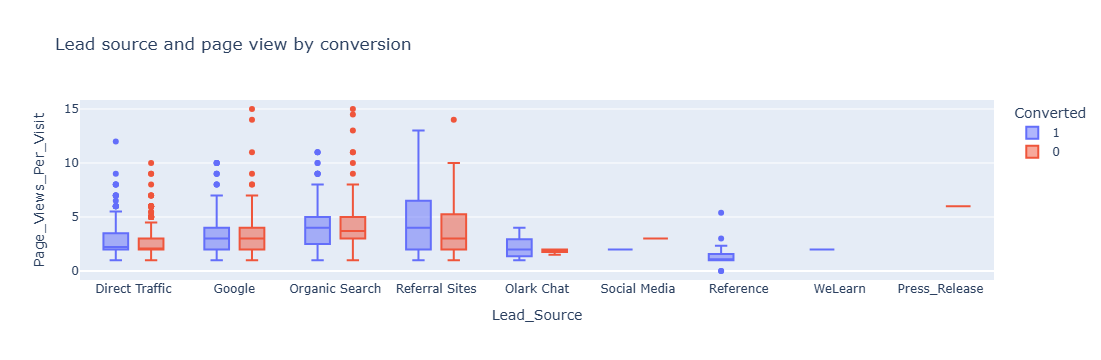

In [716]:
# Relationship between page view and lead source
plot = px.box(data_frame = df, x='Lead_Source', y='Page_Views_Per_Visit', color='Converted', title='Lead source and page view by conversion')
plot.show()


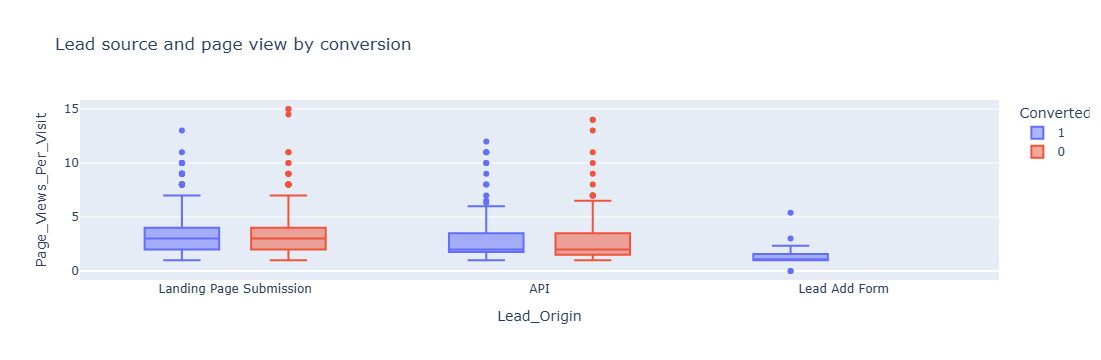

In [717]:
# Relationship between page view and lead origin
plot = px.box(data_frame = df, x='Lead_Origin', y='Page_Views_Per_Visit', color='Converted', title='Lead source and page view by conversion')
plot.show()


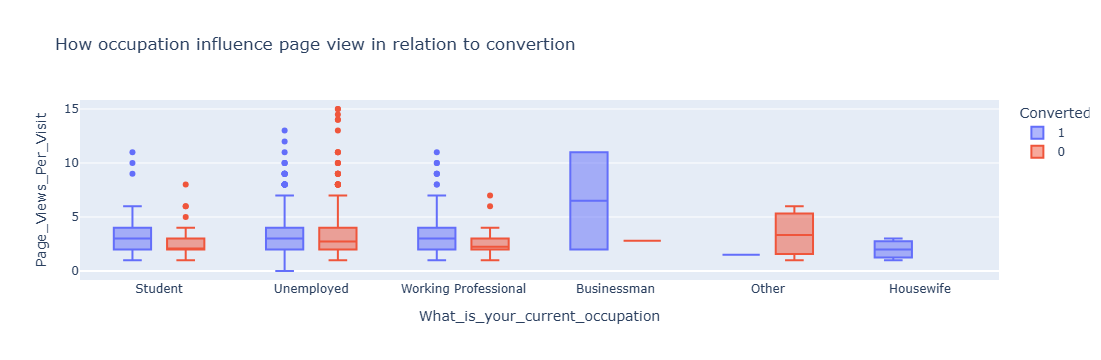

In [718]:
# Relationship between Occupation and page view
plot = px.box(data_frame = df, x='What_is_your_current_occupation', y='Page_Views_Per_Visit', color='Converted', title='How occupation influence page view in relation to convertion')
plot.show()


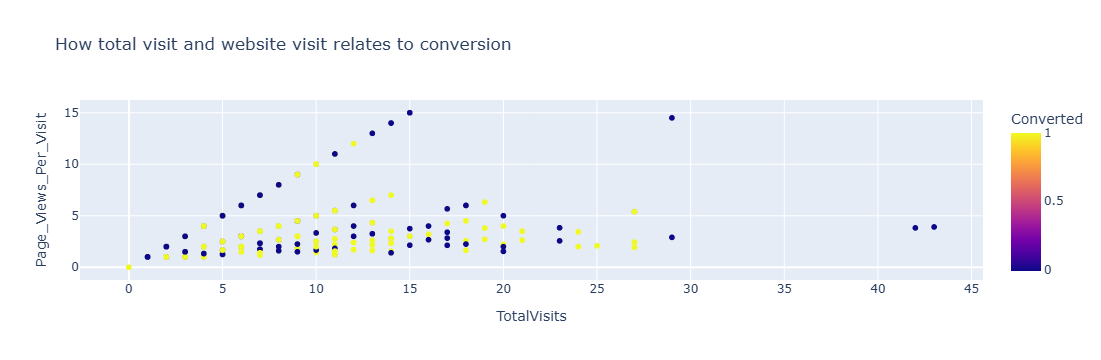

In [719]:
# Customer conversion in relation to page vie and total visit of website

plot=px.scatter(data_frame=df,x='TotalVisits',y='Page_Views_Per_Visit',color='Converted', title='How total visit and website visit relates to conversion')
plot.show()

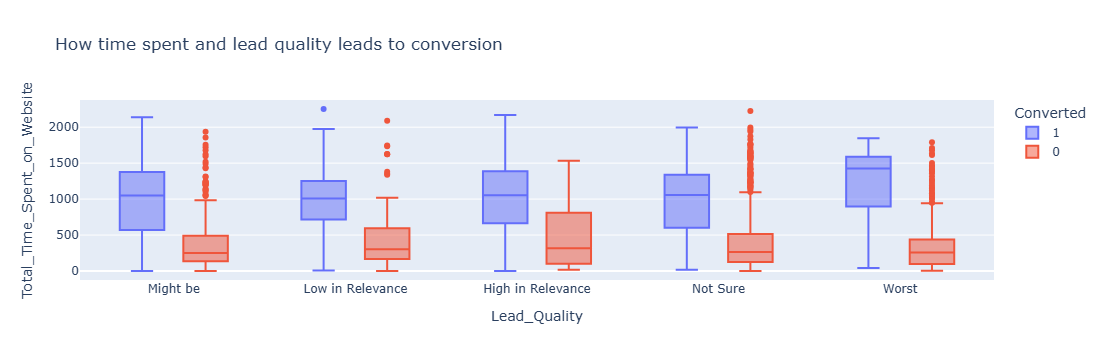

In [720]:
# How total time spent is significantly related to lead quality by converted customers

plot = px.box(data_frame = df, x='Lead_Quality', y='Total_Time_Spent_on_Website', color='Converted', title='How time spent and lead quality leads to conversion')
plot.show()

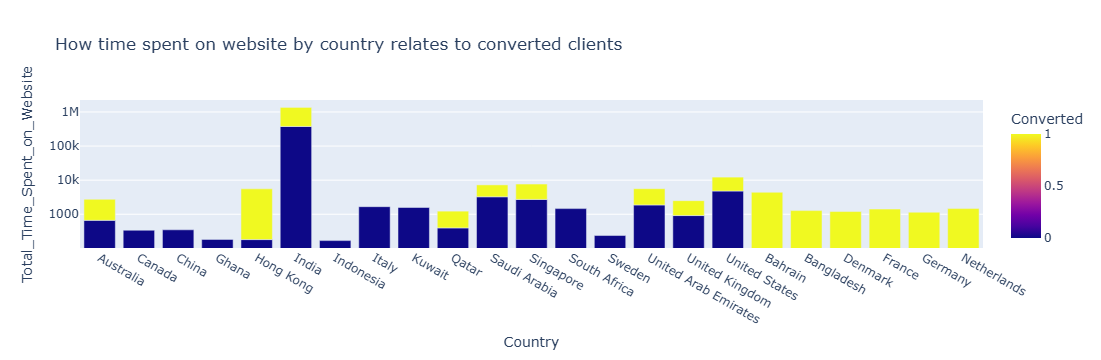

In [721]:
df2=df.loc[:,['Total_Time_Spent_on_Website','TotalVisits','Converted','Country']].groupby(['Converted','Country']).sum().reset_index()
plot=px.bar(data_frame=df2,x='Country',y='Total_Time_Spent_on_Website',color='Converted', barmode='group', title='How time spent on website by country relates to converted clients',log_y=True)
plot.show()

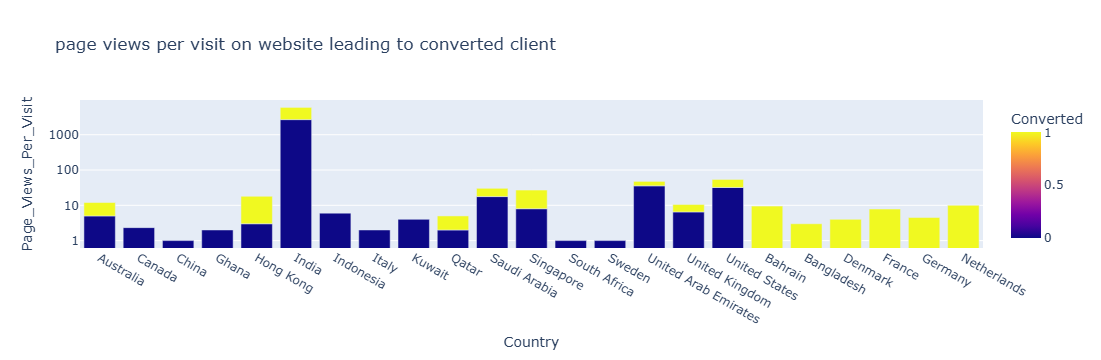

In [722]:
df2=df.loc[:,['Total_Time_Spent_on_Website','Page_Views_Per_Visit','TotalVisits','Converted','Country']].groupby(['Converted','Country']).sum().reset_index()
df2
plot=px.bar(data_frame=df2,x='Country',y='Page_Views_Per_Visit',color='Converted', barmode='group', title='page views per visit on website leading to converted client',log_y=True)
plot.show()

# correlation matrix

[Text(0.5, 0, 'Converted'),
 Text(1.5, 0, 'TotalVisits'),
 Text(2.5, 0, 'Total_Time_Spent_on_Website'),
 Text(3.5, 0, 'Page_Views_Per_Visit')]

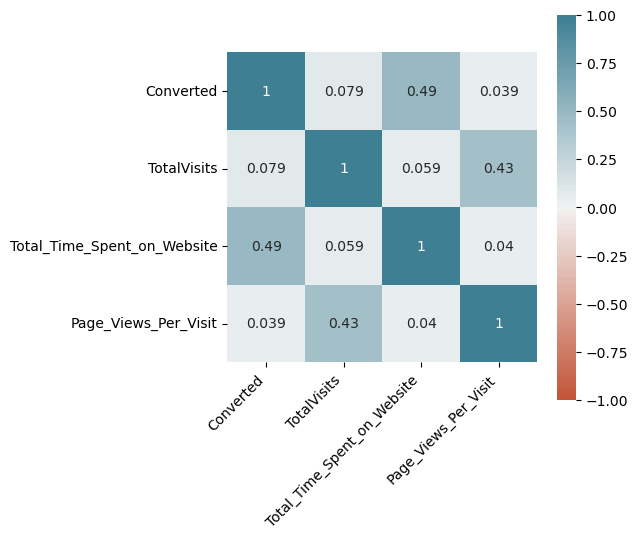

In [724]:
corr = df.corr(min_periods=5,numeric_only= True)
corr
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

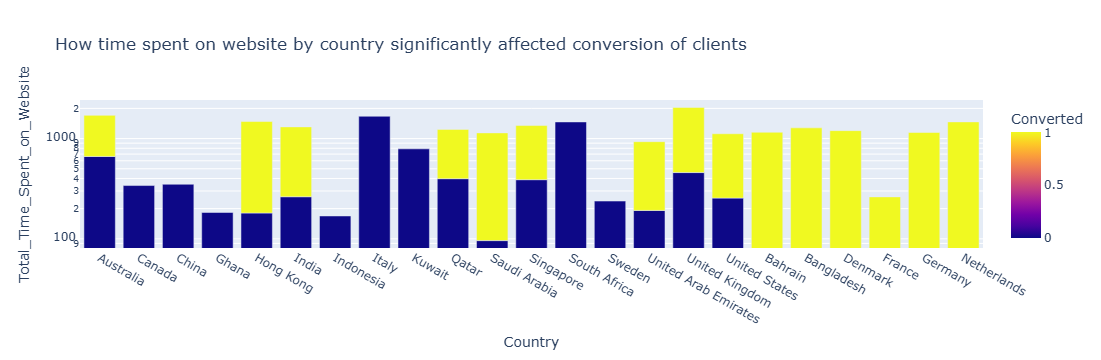

In [725]:
df2=df.loc[:,['Total_Time_Spent_on_Website','TotalVisits','Converted','Country']].groupby(['Converted','Country']).median().reset_index()
df2
plot=px.bar(data_frame=df2,x='Country',y='Total_Time_Spent_on_Website',color='Converted', barmode='group', title='How time spent on website by country significantly affected conversion of clients',log_y=True)
plot.show()

# Split data into train and test

In [727]:
df.columns

Index(['Lead_Origin', 'Lead_Source', 'Do_Not_Email', 'Do_Not_Call',
       'Converted', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Last_Activity', 'Country', 'Specialization',
       'How_did_you_hear_about_X_Education', 'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Search', 'Magazine',
       'Newspaper_Article', 'X_Education_Forums', 'Newspaper',
       'Digital_Advertisement', 'Through_Recommendations',
       'Receive_More_Updates_About_Our_Courses', 'Tags', 'Lead_Quality',
       'Update_me_on_Supply_Chain_Content', 'Get_updates_on_DM_Content',
       'Lead_Profile', 'City', 'Cheque payment',
       'free copy Mastering the interview', 'Last_Notable_Activity'],
      dtype='object')

In [728]:
df['Specialization'].unique()

array(['Business Administration', 'Media and Advertising', 'Select',
       'Supply Chain Management', 'Travel and Tourism',
       'Marketing Management', 'Banking, Investment And Insurance',
       'Finance Management', 'International Business',
       'Human Resource Management', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'IT Projects Management',
       'Services Excellence', 'Hospitality Management', 'E-Business',
       'Healthcare Management', 'Rural and Agribusiness'], dtype=object)

In [729]:
df['Lead_Profile'].unique()

array(['Potential Lead', 'Select', 'Other Leads',
       'Dual Specialization Student', 'Student of SomeSchool',
       'Lateral Student'], dtype=object)

In [730]:
df['Lead_Quality'].unique()

array(['Might be', 'Not Sure', 'Low in Relevance', 'Worst',
       'High in Relevance'], dtype=object)

In [731]:
df['Lead_Origin'].unique()

array(['Landing Page Submission', 'API', 'Lead Add Form'], dtype=object)

In [732]:
df['Lead_Source'].unique()

array(['Direct Traffic', 'Google', 'Organic Search', 'Referral Sites',
       'Olark Chat', 'Social Media', 'Reference', 'WeLearn',
       'Press_Release'], dtype=object)

In [733]:
y=df['Converted']
x=df.loc[:,[ 'Lead_Source','Do_Not_Email',
       'Do_Not_Call','TotalVisits',
       'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Country', 'Specialization']]
X_enc = pd.get_dummies(x,dtype=int,columns=[ 'Lead_Source','Do_Not_Email',
       'Do_Not_Call',
       'Country', 'Specialization'])
display(X_enc.head())
display(x.shape)
display(X_enc.shape)

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,2.0,1640,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,8.0,1351,8.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


(1943, 8)

(1943, 58)

In [734]:
#Checking if the data is imbalanced or not, this is for classification problem
sum(y)/ len(y)
y.value_counts(normalize=True)
# 54% of the leads were converted. We need to make sure that we maintain the same % across both training and testing datasets
# this kind of splitting the data maintaining the ratio is called "stratification"

Converted
1    0.536284
0    0.463716
Name: proportion, dtype: float64

In [735]:
x_train,x_test,y_train,y_test=train_test_split(X_enc,y,test_size=0.33,random_state=42, stratify=y)


In [736]:
y_train.shape
y_test.shape
x_train.shape
x_test.shape

(642, 58)

# Perform Standard scaler to fit train set

In [738]:
scaler=StandardScaler()
print(scaler.fit(x_train))
print(scaler.mean_)

StandardScaler()
[4.78324366e+00 7.20744812e+02 3.20942352e+00 3.60491929e-01
 4.23520369e-01 1.92159877e-02 1.69100692e-01 0.00000000e+00
 6.14911606e-03 2.07532667e-02 7.68639508e-04 0.00000000e+00
 9.28516526e-01 7.14834743e-02 9.99231360e-01 7.68639508e-04
 1.53727902e-03 1.53727902e-03 0.00000000e+00 7.68639508e-04
 7.68639508e-04 7.68639508e-04 1.53727902e-03 0.00000000e+00
 7.68639508e-04 1.53727902e-03 9.58493467e-01 7.68639508e-04
 7.68639508e-04 0.00000000e+00 0.00000000e+00 7.68639508e-04
 1.53727902e-03 6.91775557e-03 0.00000000e+00 7.68639508e-04
 8.45503459e-03 7.68639508e-04 1.15295926e-02 4.99615680e-02
 6.91775557e-02 1.15295926e-02 1.30668716e-02 1.38355111e-01
 1.99846272e-02 1.38355111e-02 1.26056879e-01 5.84166026e-02
 2.07532667e-02 1.30668716e-01 2.61337433e-02 7.37893928e-02
 1.53727902e-02 8.45503459e-03 1.42198309e-01 6.14911606e-03
 4.91929285e-02 2.69023828e-02]


# Transform  train set with standard scaler (Normalization)

In [740]:
X_transform=scaler.transform(x_train)
X_transform

array([[-0.21205578, -0.97427234,  0.42792468, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [ 0.05868472, -0.71757537, -0.38399805, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-1.0242773 ,  2.18148471, -1.19592079, ..., -0.07865851,
        -0.22746005, -0.16627125],
       ...,
       [-0.21205578,  0.8656884 , -0.65463897, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-0.48279629, -0.82707548, -0.11335714, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-0.7535368 , -0.88092799, -0.65463897, ..., -0.07865851,
        -0.22746005, -0.16627125]])

# Tranform test set with standard scaler

In [742]:
x_train

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
3745,4.0,178,4.00,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1968,5.0,321,2.50,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8019,1.0,1936,1.00,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2397,5.0,1715,1.67,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8671,3.0,294,1.50,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,4.0,1652,4.00,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
31,3.0,88,1.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
759,4.0,1203,2.00,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7813,3.0,260,3.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [743]:
x_test

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Press_Release,Lead_Source_Reference,Lead_Source_Referral Sites,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
9121,3.0,314,3.00,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8066,2.0,289,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8633,1.0,341,1.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8399,3.0,14,1.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,14.0,148,14.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8488,2.0,267,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2552,4.0,339,4.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8188,4.0,62,4.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2043,2.0,1554,2.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [744]:
x_test_trany=scaler.transform(x_test)
x_test_trany

array([[-0.48279629, -0.73014096, -0.11335714, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-0.7535368 , -0.77501805, -0.65463897, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-1.0242773 , -0.6816737 , -1.19592079, ..., -0.07865851,
        -0.22746005, -0.16627125],
       ...,
       [-0.21205578, -1.18250204,  0.42792468, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-0.7535368 ,  1.49576276, -0.65463897, ..., -0.07865851,
        -0.22746005, -0.16627125],
       [-0.21205578,  1.44191025, -1.01729779, ..., -0.07865851,
        -0.22746005, -0.16627125]])

# Train Logistic model

In [746]:
reg = linear_model.LogisticRegression()
reg
reg.fit(X_transform,y_train)

LogisticRegression()

In [747]:
predict_test=reg.predict(x_test_trany)
predict_test

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [748]:
predict_train=reg.predict(X_transform)
predict_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [749]:
y_test

9121    0
8066    0
8633    0
8399    1
1697    0
       ..
8488    0
2552    0
8188    0
2043    1
2614    1
Name: Converted, Length: 642, dtype: int64

# Create confusion matrix

In [751]:

confusion_matrix(y_test, predict_test)

array([[228,  70],
       [ 75, 269]], dtype=int64)

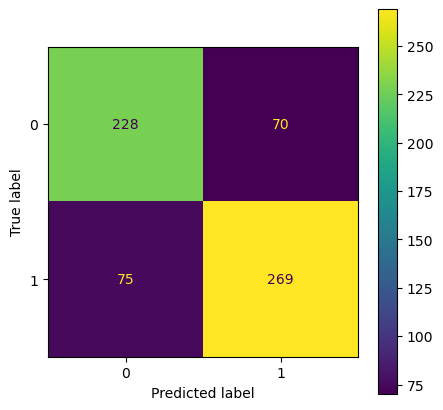

In [752]:
cm = confusion_matrix(y_test, predict_test, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)


disp.plot()
plt.show()

# logistics regression metrics on train and test data

# test metrics

In [755]:
accuracy_test=accuracy_score(y_test, reg.predict(x_test_trany))
recall_test=recall_score(y_test, reg.predict(x_test_trany),average='weighted')
precision_test=precision_score(y_test, reg.predict(x_test_trany),average='weighted')
f1_test=f1_score(y_test, reg.predict(x_test_trany),average='weighted')


In [756]:

data={"Test": ["precision", "recall", "accuracy", "f1"], "Metric": [precision_test,recall_test,accuracy_test,f1_test]}
# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

        Test    Metric
0  precision  0.774463
1     recall  0.774143
2   accuracy  0.774143
3         f1  0.774256


# train metrics

In [758]:
accuracy_train=accuracy_score(y_train, reg.predict(X_transform))
recall_train=recall_score(y_train, reg.predict(X_transform),average='weighted')
precision_train=precision_score(y_train, reg.predict(X_transform),average='weighted')
f1_train=f1_score(y_train, reg.predict(X_transform),average='weighted')

In [759]:

data = { "Train": ["precision", "recall", "accuracy", "f1"],
    "Metric": [precision_train, recall_train, accuracy_train,f1_train]}

# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

       Train    Metric
0  precision  0.772048
1     recall  0.770945
2   accuracy  0.770945
3         f1  0.771189


In [760]:
reg.coef_

array([[ 0.1335548 ,  1.15130789, -0.09488688, -0.17612779,  0.09200058,
         0.15846004,  0.01368919,  0.        ,  0.4189628 , -0.11893404,
        -0.12899979,  0.        ,  0.26655518, -0.26655518, -0.0562104 ,
         0.0562104 , -0.04094808,  0.2150962 ,  0.        , -0.1393658 ,
        -0.13471065,  0.12344975,  0.2218992 ,  0.        , -0.07592592,
        -0.00919647, -0.00860821, -0.12060579, -0.20855806,  0.        ,
         0.        , -0.13420512, -0.0273942 ,  0.03577484,  0.        ,
        -0.14388437,  0.02896882, -0.15775103,  0.08895371,  0.11444239,
        -0.08184284,  0.03422926,  0.0264379 , -0.00341587,  0.06533062,
        -0.01710477, -0.03575236,  0.05835532, -0.09640782,  0.02363761,
         0.05539293,  0.11376834, -0.02723103,  0.03903732, -0.20671991,
        -0.00159332,  0.11567323, -0.02674447]])

In [761]:
len(reg.coef_[0])

58

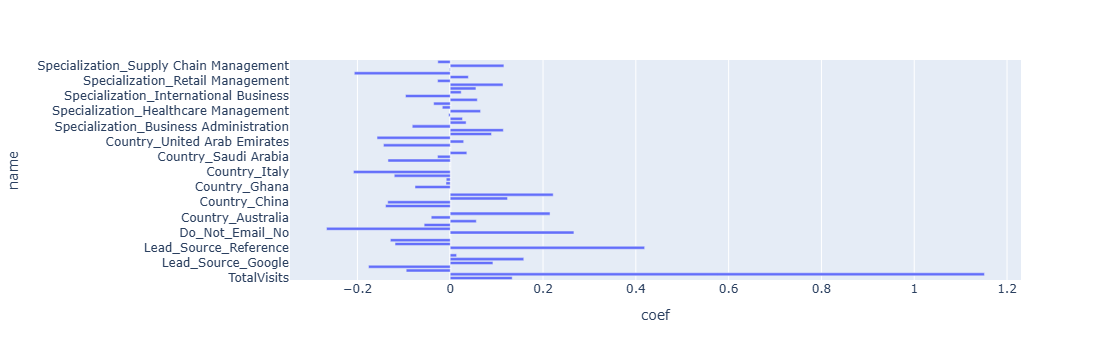

In [762]:
df_plot = pd.DataFrame({'coef':list(reg.coef_[0]),'name':x_train.columns})
px.bar(data_frame=df_plot, x='coef',y='name',height=2000)


In [763]:
x_train.columns

Index(['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Organic Search',
       'Lead_Source_Press_Release', 'Lead_Source_Reference',
       'Lead_Source_Referral Sites', 'Lead_Source_Social Media',
       'Lead_Source_WeLearn', 'Do_Not_Email_No', 'Do_Not_Email_Yes',
       'Do_Not_Call_No', 'Do_Not_Call_Yes', 'Country_Australia',
       'Country_Bahrain', 'Country_Bangladesh', 'Country_Canada',
       'Country_China', 'Country_Denmark', 'Country_France', 'Country_Germany',
       'Country_Ghana', 'Country_Hong Kong', 'Country_India',
       'Country_Indonesia', 'Country_Italy', 'Country_Kuwait',
       'Country_Netherlands', 'Country_Qatar', 'Country_Saudi Arabia',
       'Country_Singapore', 'Country_South Africa', 'Country_Sweden',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_United States',
       'Specialization_Banking, 

In [764]:
#Monitor Training Metrics During Training: If you're using the XGBoost native API, you can specify evaluation metrics for the training set as part of the training process using the eval_set parameter.
eval_set = [(X_transform, y_train)]
reg.fit(X_transform, y_train, sample_weight=None)

LogisticRegression()

# Decision Tree model

[Text(0.43951612903225806, 0.9166666666666666, 'x[1] <= -0.284\ngini = 0.497\nsamples = 1301\nvalue = [603, 698]'),
 Text(0.24193548387096775, 0.75, 'x[13] <= 1.663\ngini = 0.379\nsamples = 633\nvalue = [472, 161]'),
 Text(0.16129032258064516, 0.5833333333333334, 'x[8] <= 6.317\ngini = 0.403\nsamples = 568\nvalue = [409, 159]'),
 Text(0.12903225806451613, 0.4166666666666667, 'x[54] <= 1.024\ngini = 0.4\nsamples = 565\nvalue = [409, 156]'),
 Text(0.06451612903225806, 0.25, 'x[3] <= 0.291\ngini = 0.419\nsamples = 469\nvalue = [329, 140]'),
 Text(0.03225806451612903, 0.08333333333333333, 'gini = 0.45\nsamples = 249\nvalue = [164, 85]'),
 Text(0.0967741935483871, 0.08333333333333333, 'gini = 0.375\nsamples = 220\nvalue = [165, 55]'),
 Text(0.1935483870967742, 0.25, 'x[1] <= -1.274\ngini = 0.278\nsamples = 96\nvalue = [80, 16]'),
 Text(0.16129032258064516, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.22580645161290322, 0.08333333333333333, 'gini = 0.256\nsample

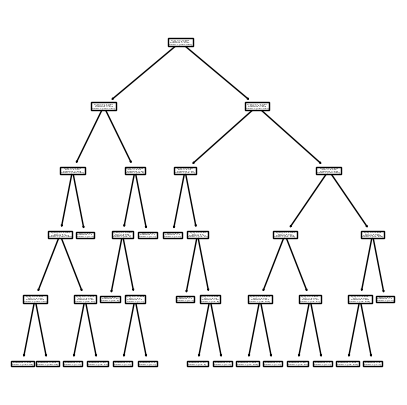

In [766]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_transform, y_train)
tree.plot_tree(clf)

In [767]:
clf.feature_importances_

array([0.03567964, 0.84331583, 0.01220996, 0.00786188, 0.        ,
       0.        , 0.        , 0.        , 0.01260911, 0.        ,
       0.        , 0.        , 0.03319502, 0.02919638, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00483489, 0.        , 0.00390566,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01719162,
       0.        , 0.        , 0.        ])

In [768]:
df_plot = pd.DataFrame({'coef':list(clf.feature_importances_),'name':x_train.columns})

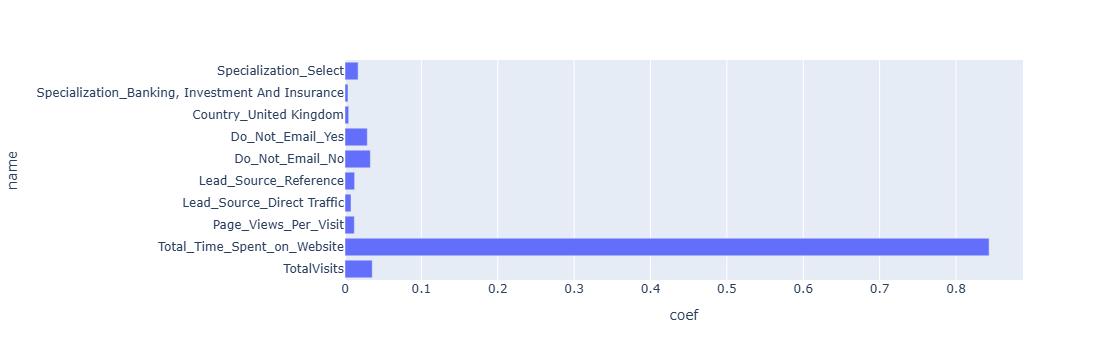

In [769]:

px.bar(data_frame=df_plot[df_plot['coef'] > 0], x='coef',y='name',height=2000)

In [770]:
Predict_clf=clf.predict(x_test_trany,check_input=True)
Predict_clf

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

# plot confussion matrix for decision tree

In [772]:
confusion_matrix(y_test, Predict_clf)

array([[234,  64],
       [ 80, 264]], dtype=int64)

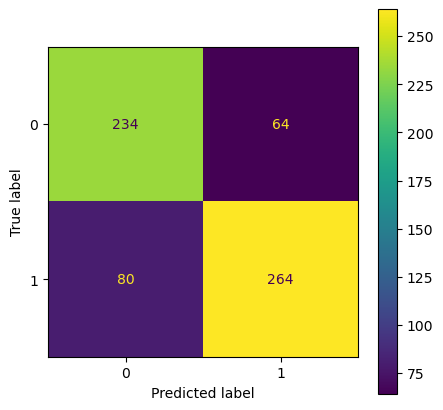

In [773]:
cm = confusion_matrix(y_test, Predict_clf, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()
plt.show()

In [774]:
clf.predict_proba(x_test_trany, check_input=True)

array([[0.65863454, 0.34136546],
       [0.84946237, 0.15053763],
       [1.        , 0.        ],
       ...,
       [0.75      , 0.25      ],
       [0.22380952, 0.77619048],
       [0.11968085, 0.88031915]])

# decision tree metrics on train and test data

In [776]:
accuracy_test=accuracy_score(y_test, clf.predict(x_test_trany))
recall_test=recall_score(y_test, clf.predict(x_test_trany),average='weighted')

precision_test=precision_score(y_test, clf.predict(x_test_trany),average='weighted')

f1_test=f1_score(y_test, clf.predict(x_test_trany),average='weighted')


In [777]:
data={"Test": ["precision", "recall", "accuracy", "f1"], "Metric": [precision_test,recall_test,accuracy_test,f1_test]}
# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

        Test    Metric
0  precision  0.777188
1     recall  0.775701
2   accuracy  0.775701
3         f1  0.775963


# train metrics

In [779]:
accuracy_train=accuracy_score(y_train, clf.predict(X_transform))
recall_train=recall_score(y_train, clf.predict(X_transform),average='weighted')

precision_train=precision_score(y_train, clf.predict(X_transform),average='weighted')

f1_train=f1_score(y_train, clf.predict(X_transform),average='weighted')

In [780]:

data = { "Train": ["precision", "recall", "accuracy", "f1"],
    "Metric": [precision_train, recall_train, accuracy_train,f1_train]}

# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)
#test and train metric are not far off from each other, which means there is no overfitting

       Train    Metric
0  precision  0.798772
1     recall  0.794773
2   accuracy  0.794773
3         f1  0.795025


In [781]:
#Monitor Training Metrics During Training: If you're using the XGBoost native API, you can specify evaluation metrics for the training set as part of the training process using the eval_set parameter.
eval_set = [(X_transform, y_train)]
clf.fit(X_transform, y_train, sample_weight=None)

DecisionTreeClassifier(max_depth=5)

# plot random forest

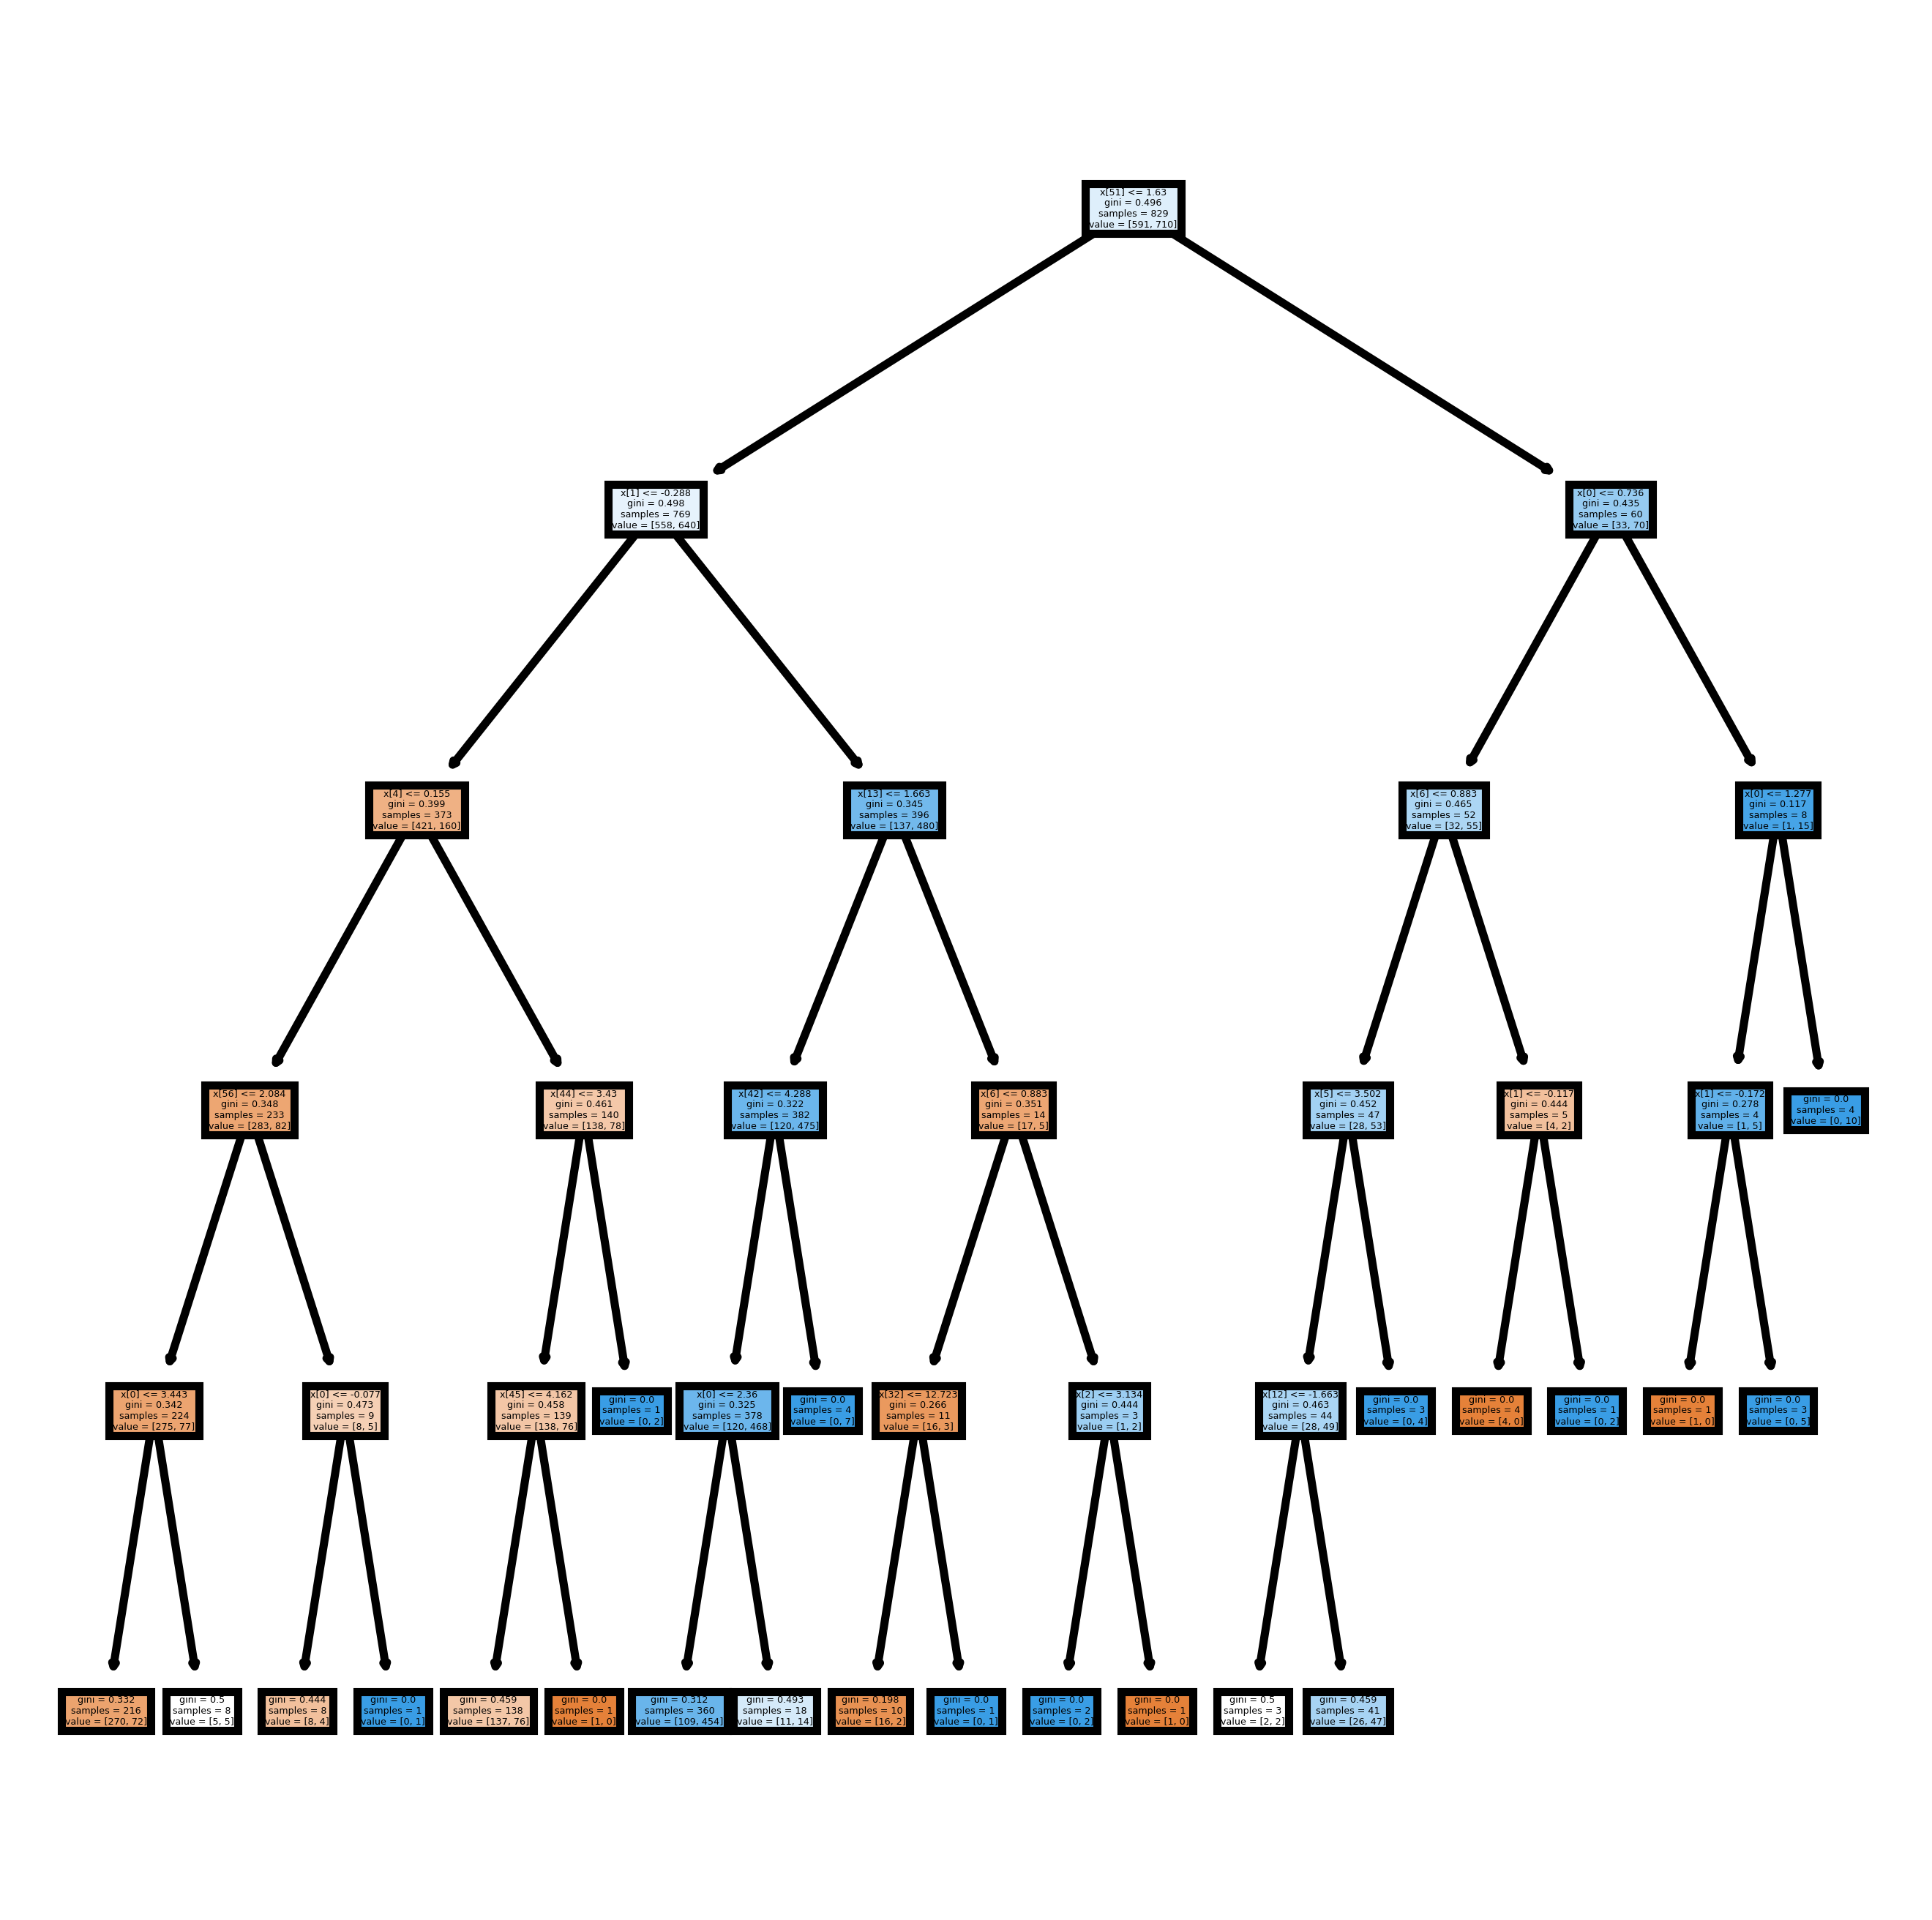

In [783]:
clf1 = RandomForestClassifier(n_estimators=50,max_depth=5)
clf1 = clf1.fit(X_transform, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf1.estimators_[5],
               feature_names = None, 
               class_names=None,
               filled = True);
fig.savefig('clf1_individualtree.png')

In [784]:
clf1.feature_importances_


array([4.69449735e-02, 5.56787772e-01, 4.24180558e-02, 2.49777340e-02,
       1.62300120e-02, 1.28604528e-02, 5.46736947e-03, 0.00000000e+00,
       5.51750813e-03, 5.35571827e-03, 1.16629440e-04, 0.00000000e+00,
       8.47371461e-02, 9.21724098e-02, 5.74554170e-05, 8.53537458e-05,
       1.29304452e-04, 1.56931839e-03, 0.00000000e+00, 0.00000000e+00,
       6.73465069e-05, 3.44216072e-05, 4.13050363e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.25814272e-03, 3.46955226e-04,
       1.11848207e-03, 0.00000000e+00, 0.00000000e+00, 5.17667967e-04,
       6.59468480e-04, 2.10026402e-03, 0.00000000e+00, 1.34803610e-04,
       8.88744474e-04, 1.51245388e-03, 1.45425185e-03, 5.56958487e-03,
       3.52361026e-03, 2.91963445e-03, 5.92127676e-04, 3.11916290e-03,
       3.05653762e-03, 3.03552300e-03, 2.69378632e-03, 4.57593613e-03,
       7.33053735e-03, 3.25707685e-03, 2.30937176e-03, 3.39095851e-03,
       1.97140867e-03, 3.13104369e-04, 3.64512354e-02, 1.31848054e-03,
      

In [785]:
# Binarize the output
y_test_bin = labels_ba(y_test, classes=[0, 1])
y_pred_prob = clf1.predict_proba(x_test_trany)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
for i in range(len(target_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {target_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-class')
plt.legend(loc="lower right")
plt.show()


NameError: name 'label_binarize' is not defined

In [ ]:
df_plot = pd.DataFrame({'coef':list(clf1.feature_importances_),'name':x_train.columns})
px.bar(data_frame=df_plot[df_plot['coef'] > 0], x='coef',y='name',height=2000)

# random forest metrics on train and test data

In [ ]:
accuracy_test=accuracy_score(y_test, clf1.predict(x_test_trany))
recall_test=recall_score(y_test, clf1.predict(x_test_trany),average='weighted')
recall_test
precision_test=precision_score(y_test, clf1.predict(x_test_trany),average='weighted')
precision_test
f1_test=f1_score(y_test, clf1.predict(x_test_trany),average='weighted')

In [ ]:
data={"Test": ["precision", "recall", "accuracy", "f1"], "Metric": [precision_test,recall_test,accuracy_test,f1_test]}
# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

# train

In [ ]:
accuracy_train=accuracy_score(y_train, clf1.predict(X_transform))
recall_train=recall_score(y_train, clf1.predict(X_transform),average='weighted')

precision_train=precision_score(y_train, clf1.predict(X_transform),average='weighted')

f1_train=f1_score(y_train, clf1.predict(X_transform),average='weighted')

In [ ]:

#the performance of our test and train set is similar, which means there is no overfitting
# Create a dictionary
data = { "Train": ["precision", "recall", "accuracy", "f1"],
    "Metric": [precision_train, recall_train, accuracy_train,f1_train]}

# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

# plot confussion matrix for random forest

In [ ]:
Predict_clf1=clf1.predict(x_test_trany)
Predict_clf1

In [ ]:
confusion_matrix(y_test, Predict_clf1)

In [ ]:
cm = confusion_matrix(y_test, Predict_clf1, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()
plt.show()

In [655]:
#Monitor Training Metrics During Training: If you're using the XGBoost native API, you can specify evaluation metrics for the training set as part of the training process using the eval_set parameter.
eval_set = [(X_transform, y_train)]
clf1.fit(X_transform, y_train, sample_weight=None)


RandomForestClassifier(max_depth=5, n_estimators=50)

# plot XGboost model

In [658]:
GBx=xgb.XGBClassifier(n_estimators=5,max_depth=5)
GBx.fit(X_transform,y_train)
#the rule of tumb for max_dept is between 0-10

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

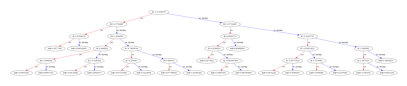

In [659]:
xgb.plot_tree(GBx,num_trees = 2)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [660]:
GBx.feature_importances_

array([0.03522556, 0.4162975 , 0.03158837, 0.03034908, 0.03564872,
       0.0396014 , 0.02623677, 0.        , 0.        , 0.03150267,
       0.        , 0.        , 0.10069494, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03551162,
       0.01363409, 0.        , 0.        , 0.02690838, 0.        ,
       0.        , 0.02745855, 0.        , 0.04389357, 0.        ,
       0.        , 0.06259061, 0.        , 0.        , 0.04285815,
       0.        , 0.        , 0.        ], dtype=float32)

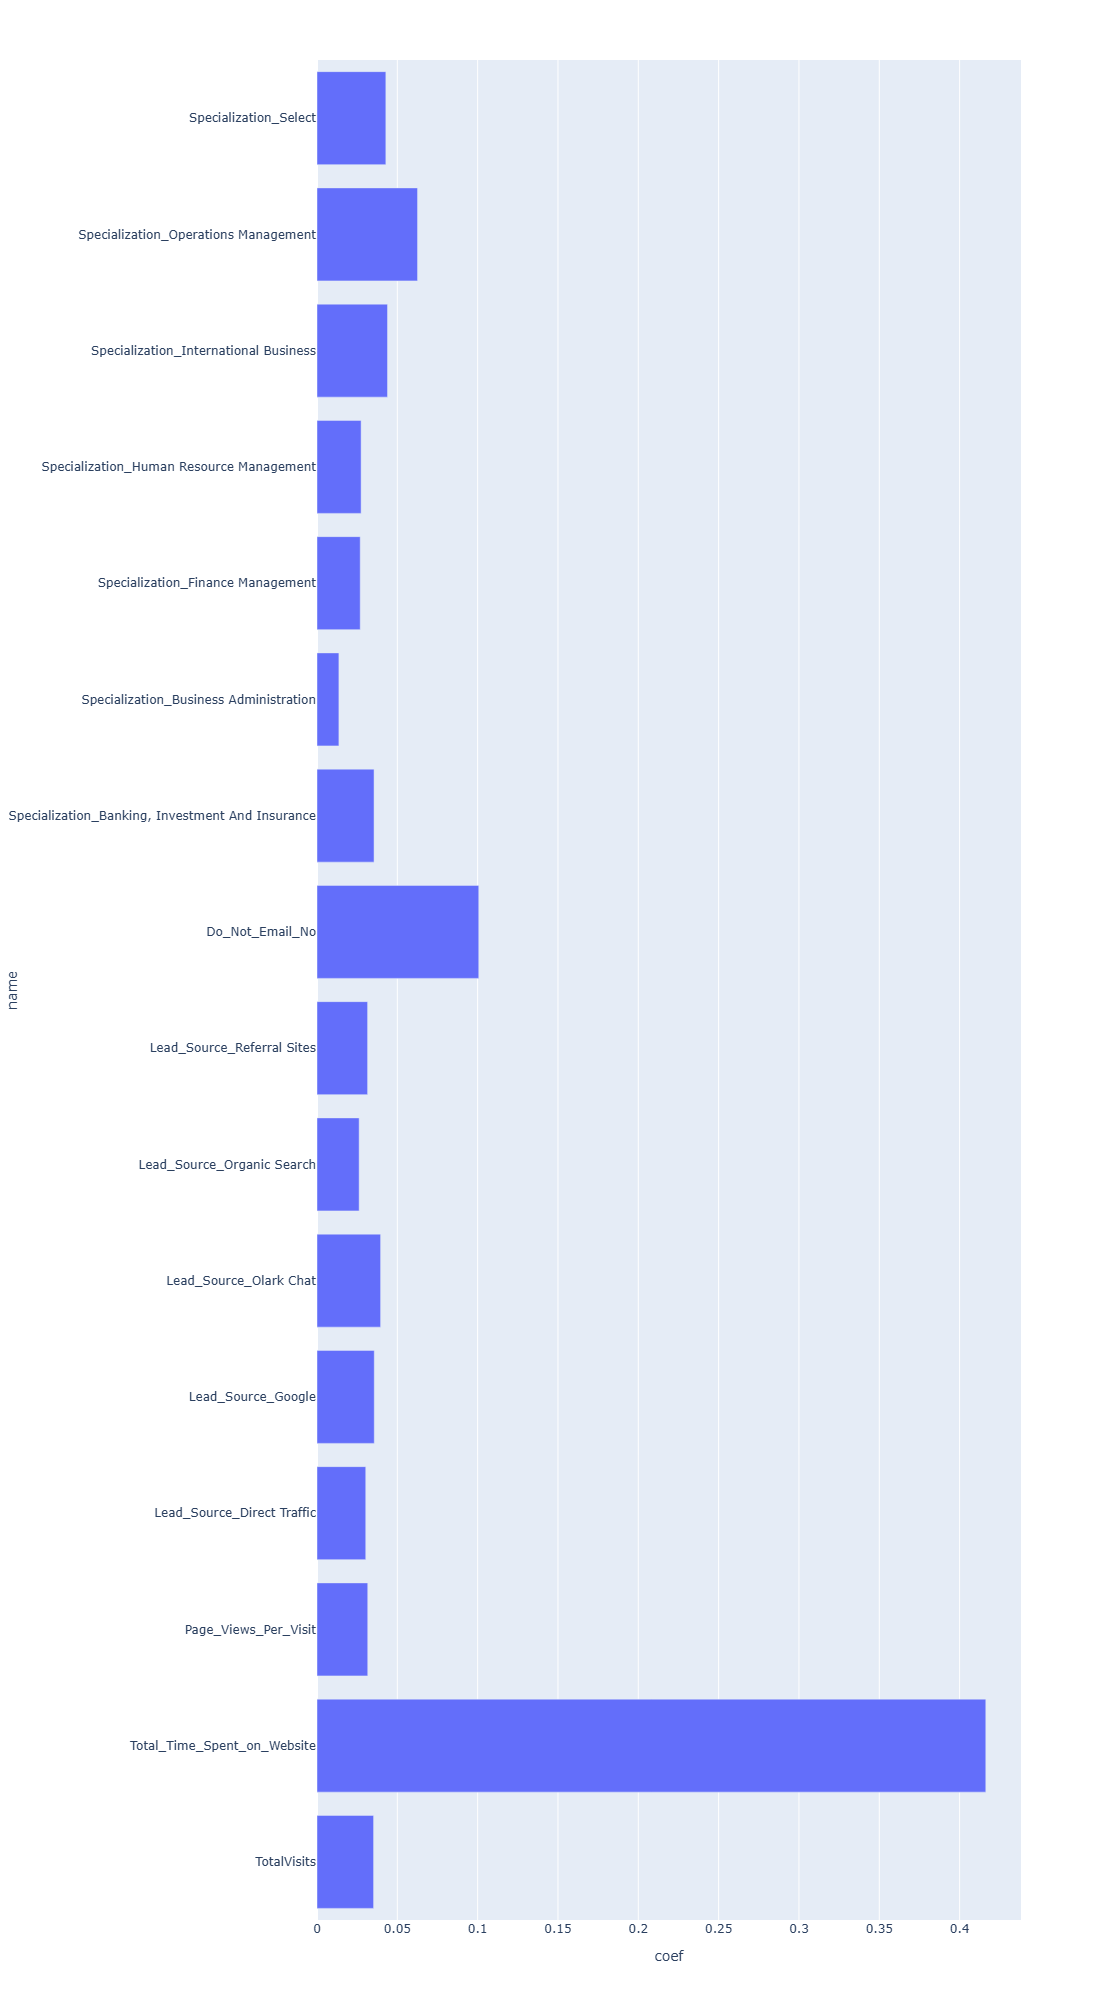

In [661]:
df_plot = pd.DataFrame({'coef':list(GBx.feature_importances_),'name':x_train.columns})
px.bar(data_frame=df_plot[df_plot['coef'] > 0], x='coef',y='name',height=2000)

# XGBoost metrics on train and test data

In [663]:
accuracy_test=accuracy_score(y_test, GBx.predict(x_test_trany))
recall_test=recall_score(y_test, GBx.predict(x_test_trany),average='weighted')
precision_test=precision_score(y_test, GBx.predict(x_test_trany),average='weighted')
f1_test=f1_score(y_test, GBx.predict(x_test_trany),average='weighted')

In [664]:

data={"Test": ["precision", "recall", "accuracy", "f1"], "Metric": [precision_test,recall_test,accuracy_test,f1_test]}
# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

        Test    Metric
0  precision  0.773816
1     recall  0.772586
2   accuracy  0.772586
3         f1  0.772833


# train

In [666]:
accuracy_train=accuracy_score(y_train, GBx.predict(X_transform))
recall_train=recall_score(y_train, GBx.predict(X_transform),average='weighted')
precision_train=precision_score(y_train, GBx.predict(X_transform),average='weighted')
f1_train=f1_score(y_train, GBx.predict(X_transform),average='weighted')

In [667]:

data = { "Train": ["precision", "recall", "accuracy", "f1"],
    "Metric": [precision_train, recall_train, accuracy_train,f1_train]}

# Create DataFrame
dr = pd.DataFrame(data)

# Display the DataFrame
print(dr)

       Train    Metric
0  precision  0.795178
1     recall  0.792467
2   accuracy  0.792467
3         f1  0.792744


In [668]:
Predict_GBx=GBx.predict(x_test_trany)
Predict_GBx

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

# plot confusion matrix for XGBoost

In [670]:
confusion_matrix(y_test, Predict_GBx)

array([[232,  66],
       [ 80, 264]], dtype=int64)

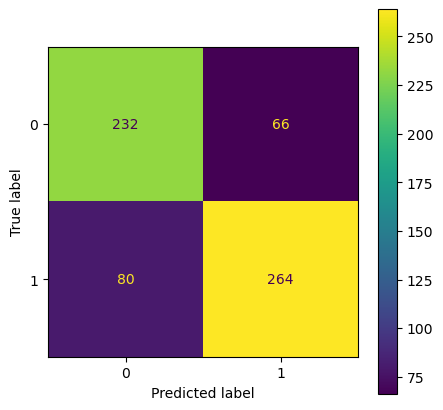

In [671]:
cm = confusion_matrix(y_test, Predict_GBx, labels=reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=reg.classes_)
disp.plot()
plt.show()

In [672]:
#Monitor Training Metrics During Training: If you're using the XGBoost native API, you can specify evaluation metrics for the training set as part of the training process using the eval_set parameter.
eval_set = [(X_transform, y_train)]
GBx.fit(X_transform, y_train, eval_set=eval_set, verbose=True)


[0]	validation_0-logloss:0.59806
[1]	validation_0-logloss:0.54804
[2]	validation_0-logloss:0.51667
[3]	validation_0-logloss:0.49650
[4]	validation_0-logloss:0.48339


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)